# Лабораторна робота №2
## Тема: Tensorflow
### Завдання
1. На основі документу вирішити завдання класифікації для набору даних Fashion MNIST.
2. Для моделювання використати 3 класи індекси яких взяти відповідно до номеру у списку групи у наведеній нижче таблиці.
3. Моделювання провести із використанням нейронної мережі (Flatten & Dense layers).
4. Здійснити вибір оптимального кроку градієнтного алгоритму (learning_rate), а також побудову Confusion Matrix.
5. Результати оформити у вигляді файлу з кодом для моделювання та візуалізації у форматі .ipynb
6. Результати викласти у репозиторії GitHub (папка Lab3).
7. Підготуватися до захисту лабораторрної роботи (пояснення коду, відповіді на запитання за темою)

## Виконала
### студентка 4 курсу
### групи АнД-41
### Кліменкова Ніна
### Варіант 7

## Бібліотеки

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras.losses import mae, mse
from tensorflow.keras.optimizers import SGD, Adam
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Формуємо дані

In [3]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 11s 2us/step


In [4]:
print(f"Training sample:\n{train_data[0]}\n") 
print(f"Training label: {train_labels[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [6]:
# Check the shape of our data
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [7]:
# Check shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

Okay, 60,000 training examples each with shape (28, 28) and a label each as well as 10,000 test examples of shape (28, 28).

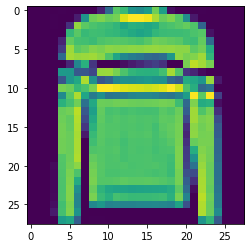

In [11]:
# Plot a single example
plt.imshow(train_data[5]);

In [12]:
train_labels[5]

2

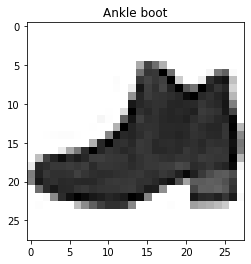

In [15]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)
plt.imshow(train_data[15], cmap=plt.cm.binary) # change the colours to black & white
plt.title(class_names[train_labels[15]]);

## Формуємо класи

In [17]:
my_classes = [6, 9, 3]
train_index = np.where(np.in1d(train_labels, my_classes))
test_index = np.where(np.in1d(test_labels, my_classes))

In [21]:
x_train = train_data[train_index]
y_train = train_labels[train_index]
x_test = test_data[test_index]
y_test = test_labels[test_index]
print( "x_train.shape: ",x_train.shape)
print( "y_train.shape: ",y_train.shape)
print( "x_test.shape: ",x_test.shape)
print( "y_test.shape: ",y_test.shape)

x_train.shape:  (18000, 28, 28)
y_train.shape:  (18000,)
x_test.shape:  (3000, 28, 28)
y_test.shape:  (3000,)


In [20]:
print(len(x_train))
print(x_train)

18000
[[[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]

 [[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]

 [[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   3   0   0]
  [  0   0   0 ...   9   0   0]
  ...
  [  0   9 188 ...   7   0   0]
  [  0   0   0 ...   4   0   0]
  [  0   0   0 ...   0   0   0]]

 ...

 [[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   3   0   0]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]

 [[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0

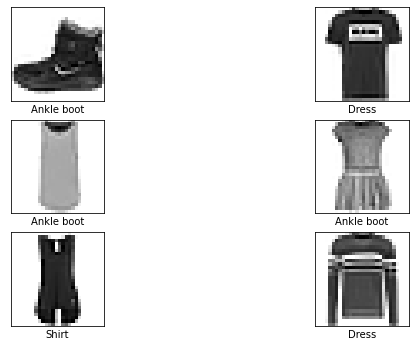

In [22]:
#картинки
plt.figure(figsize=(10,10))
for p in range(6):
    plt.subplot(5,2,p+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(train_data[p], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[p]], color='black')

## Модель

In [31]:
model_1 = Sequential([
    Flatten(input_shape=(28,28)), 
    Dense(100 , activation='softmax'),
    Dense(10, activation='softmax')
])

model_1.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = Adam(learning_rate=0.01), 
    metrics=['accuracy']
)


In [32]:
history = model_1.fit(
    x_train,y_train, 
    epochs = 10, 
    validation_data=(x_test,y_test), 
    batch_size = 512
)

Epoch 1/10
36/36 [==============================] - 0s 6ms/step - loss: 1.7470 - accuracy: 0.7983 - val_loss: 1.3302 - val_accuracy: 0.8883
Epoch 2/10
36/36 [==============================] - 0s 4ms/step - loss: 1.0673 - accuracy: 0.8921 - val_loss: 0.8388 - val_accuracy: 0.9097
Epoch 3/10
36/36 [==============================] - 0s 4ms/step - loss: 0.7296 - accuracy: 0.8989 - val_loss: 0.5736 - val_accuracy: 0.9257
Epoch 4/10
36/36 [==============================] - 0s 3ms/step - loss: 0.5775 - accuracy: 0.8803 - val_loss: 0.5313 - val_accuracy: 0.8973
Epoch 5/10
36/36 [==============================] - 0s 4ms/step - loss: 0.4768 - accuracy: 0.9045 - val_loss: 0.4348 - val_accuracy: 0.9080
Epoch 6/10
36/36 [==============================] - 0s 4ms/step - loss: 0.3776 - accuracy: 0.9265 - val_loss: 0.4080 - val_accuracy: 0.8957
Epoch 7/10
36/36 [==============================] - 0s 4ms/step - loss: 0.3575 - accuracy: 0.9163 - val_loss: 0.5859 - val_accuracy: 0.7860
Epoch 8/10
36/36 [==

In [33]:
model_1.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [34]:
test_loss, test_acc = model_1.evaluate(x_test,y_test)
print('Test accuracy : ', test_acc)

94/94 [==============================] - 0s 1ms/step - loss: 0.3035 - accuracy: 0.9150
Test accuracy :  0.9150000214576721


## Перевірка

In [59]:
predictions = model_1.predict(x_test)


In [36]:
np.argmax(predictions[0])

9

In [37]:
test_labels[0]

9

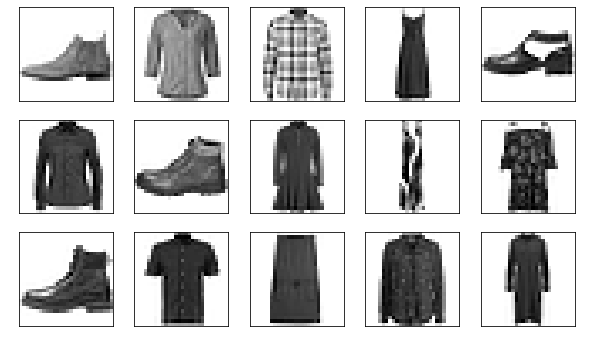

In [40]:
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = y_test[i]
    if (predicted_label == true_label):
        color = 'white'
    else :
        color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label], class_names[true_label]), color = color)

## Залежність точності від швидкості навчання

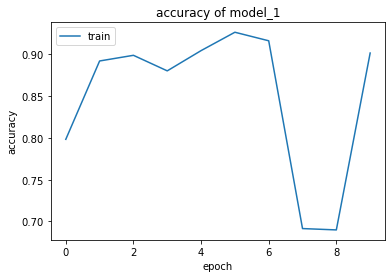

In [43]:
plt.plot(history.history['accuracy'])
plt.title('accuracy of model_1')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## loss

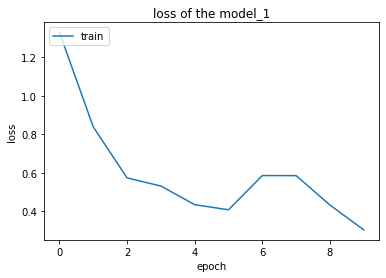

In [44]:
plt.plot(history.history['val_loss'])
plt.title('loss of the model_1')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## learning rate = 0.0001

In [45]:
model_2 = Sequential([
    Flatten(input_shape=(28,28)), 
    Dense(100 , activation='relu'),
    Dense(10, activation='softmax')
])

model_2.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = Adam(learning_rate=0.0001), 
    metrics=['accuracy']
)

In [46]:
history_2 = model_2.fit(
    x_train,y_train, 
    epochs = 20, 
    validation_data=(x_test,y_test), 
    batch_size = 512
)

Epoch 1/20
36/36 [==============================] - 0s 6ms/step - loss: 105.9139 - accuracy: 0.4186 - val_loss: 6.8036 - val_accuracy: 0.8733
Epoch 2/20
36/36 [==============================] - 0s 3ms/step - loss: 4.7878 - accuracy: 0.8998 - val_loss: 4.9540 - val_accuracy: 0.9083
Epoch 3/20
36/36 [==============================] - 0s 4ms/step - loss: 3.6534 - accuracy: 0.9142 - val_loss: 4.1752 - val_accuracy: 0.9107
Epoch 4/20
36/36 [==============================] - 0s 3ms/step - loss: 3.0891 - accuracy: 0.9199 - val_loss: 3.7025 - val_accuracy: 0.9110
Epoch 5/20
36/36 [==============================] - 0s 3ms/step - loss: 2.7177 - accuracy: 0.9241 - val_loss: 3.3636 - val_accuracy: 0.9160
Epoch 6/20
36/36 [==============================] - 0s 3ms/step - loss: 2.4703 - accuracy: 0.9268 - val_loss: 3.1114 - val_accuracy: 0.9200
Epoch 7/20
36/36 [==============================] - 0s 3ms/step - loss: 2.2340 - accuracy: 0.9326 - val_loss: 2.8964 - val_accuracy: 0.9220
Epoch 8/20
36/36 [

In [47]:
test_loss, test_acc = model_2.evaluate(x_test,y_test)
print('Test accuracy : ', test_acc)

94/94 [==============================] - 0s 811us/step - loss: 1.7790 - accuracy: 0.9420
Test accuracy :  0.9419999718666077


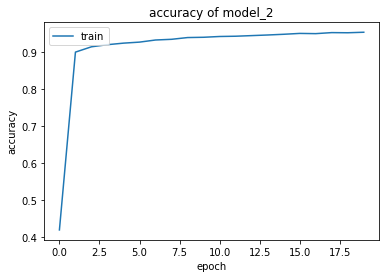

In [49]:
plt.plot(history_2.history['accuracy'])
plt.title('accuracy of model_2')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

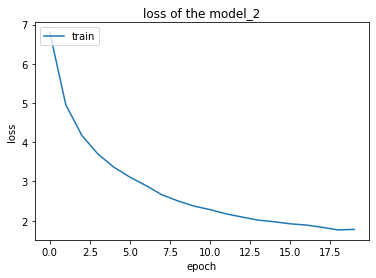

In [51]:
plt.plot(history_2.history['val_loss'])
plt.title('loss of the model_2')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Confusion Matrix

In [52]:
from sklearn.metrics import confusion_matrix

In [58]:
predyction_sampl = [np.argmax(i) for i in predictions]
my_matrix = confusion_matrix(y_test,predyction_sampl)
dataf_confusion = pd.DataFrame(my_matrix, columns=['T-shirt/top', 'Shirt', 'Dress'], index = ['T-shirt/top', 'Shirt', 'Dress'])
dataf_confusion

,T-shirt/top,Shirt,Dress
T-shirt/top,964,36,0
Shirt,209,791,0
Dress,8,2,990


# Висновок
## У ході виконання даної лабораторної роботи було побудовано декілька моделей за допомогою Flatten & Dense layers та дослідили як точність моделі залежить від швидкості навчання. Вирішили завдання класифікації для набору даних Fashion MNIST. Також побудували Confusion Matrix